In [1]:
# pipenv install pandas plotly matplotlib ipykernel pingouin nbformat scikit-learn optuna ipywidgets gradio

import pandas as pd 
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff 
import matplotlib.pyplot as plt 

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import optuna

In [2]:
# Carregar data set
df_segmento = pd.read_csv('.\datasets\segmentos_clientes.csv')

## EDA

In [4]:
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [5]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
# Valores possiveis de cada variavel categorica
df_segmento.atividade_economica.unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [8]:
df_segmento.localizacao.unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [9]:
df_segmento.segmento_de_cliente.unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [12]:
df_segmento.inovacao.unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [15]:
# Distribuicao da variavel Target - segmento_de_cliente

contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [16]:
# Criar lista ordenada do target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']


In [18]:
# Distribuição da Varável target - Contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [20]:
# Distribuicao da variavel target - percentual
percentual_target = contagem_target / len(df_segmento) * 100

In [28]:
# Distribuição da Varável target - percentual
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [29]:
# Distribuição da Varável Localizacao
percentual_localizacao = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_localizacao, color=percentual_localizacao.index)

In [30]:
# Distribuição da Varável atividade economica
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index)

In [31]:
# Distribuição da Varável inovacao
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index)

In [ ]:
# Tabela de contingencia entre Localizacao e Target
crosstab_localizacao = pd.crosstab(df_segmento.localizacao, df_segmento.segmento_de_cliente, margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()

In [33]:
# Tabela de contingencia entre atividade_economica e Target
crosstab_atv = pd.crosstab(df_segmento.atividade_economica, df_segmento.segmento_de_cliente, margins=True)[lista_segmentos].reset_index()

tabela_atv = ff.create_table(crosstab_atv)

tabela_atv.show()

In [ ]:
# Tabela de contingencia entre inovacao e Target
crosstab_inovacao = pd.crosstab(df_segmento.inovacao, df_segmento.segmento_de_cliente, margins=True)[lista_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao2)

tabela_inovacao.show()

In [36]:
# Distribuição Idade da empresa
px.histogram(df_segmento, x='idade')

In [37]:
# Distribuição Faturamento mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [44]:
# Boxplot entre idade e segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [46]:
# Boxplot entre faturamento e segmento
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [ ]:
# Teste de qui quadrado - Pearson
# H0 - as variaveis são independentes
# H1 - as variaveis não são independentes
# Se pvalue maior q 0.05 aceita H0

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [ ]:
# Valor esperado - É a frequencia que seria esperada se não houvesse nenhuma associação entrea as variaveis
# Calculado utilizando a distribuição assumida no qui quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [49]:
# Valor Observado - É a frequencia real dos dados coletados
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [50]:
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


As variáveis localizacao e segmento_de_cliente são independentes, com p-value de 0.81714

In [51]:

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7406: RuntimeWarning:

divide by zero encountered in divide



In [52]:
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [53]:
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [54]:
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,9.969980,9.0,0.352921,0.081527,0.189483
1,cressie-read,0.666667,10.609948,9.0,0.303395,0.084103,0.200600
2,log-likelihood,0.000000,13.546371,9.0,0.139401,0.095031,0.253747
3,freeman-tukey,-0.500000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,9.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,9.0,NaN,NaN,NaN


As variáveis atividade_economica e segmento_de_clientes são independentes, com p-value de 0.35291

In [56]:

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

divide by zero encountered in power

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7409: RuntimeWarning:

invalid value encountered in multiply

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\scipy\stats\_stats_py.py:7406: RuntimeWarning:

divide by zero encountered in divide



In [57]:
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [58]:
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [59]:
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,164.293991,27.0,1.241317e-21,0.330952,0.998500
1,cressie-read,0.666667,165.499463,27.0,7.434558e-22,0.332164,0.998612
2,log-likelihood,0.000000,181.488777,27.0,7.822259e-25,0.347840,0.999514
3,freeman-tukey,-0.500000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,27.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,27.0,NaN,NaN,NaN


As variáveis inovacao e segmento_de_cliente não são independentes, com p-value = 0

## Treinamento do Modelo

In [92]:
x = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento.segmento_de_cliente

In [93]:
# Pipeline 
# OnehotEncode nas variáveis categoricas
# Treinamento do Modelo

# Lista de variáveis categoricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformer de variaveis categoricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy ='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com preprocessor e o modelo da arvore de decisao
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

### Validação cruzada

In [94]:
# Treinar modelo com validação cruzada, usando StratifiedKFold, dado que as classes estão desbalanceadas
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, x, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [95]:
metrics_result

{'fit_time': array([0.02520895, 0.01104355, 0.02438045]),
 'score_time': array([0.01175117, 0.01099133, 0.01267505]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [96]:
# Média da acurácia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

np.float64(0.4739917754851743)

In [97]:
# Acurácia 
# total de previsoes corretas / total de previsoes

### Métricas

In [98]:
# Fazendo predições usando cross validation
y_pred = cross_val_predict(dt_model, x, y, cv=cv_folds)

In [99]:
# Avalia o desempenho do modelo
classification_report_str = classification_report(y, y_pred)
print(f"Relatorio de Classificação: \n{classification_report_str}")

Relatorio de Classificação: 
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



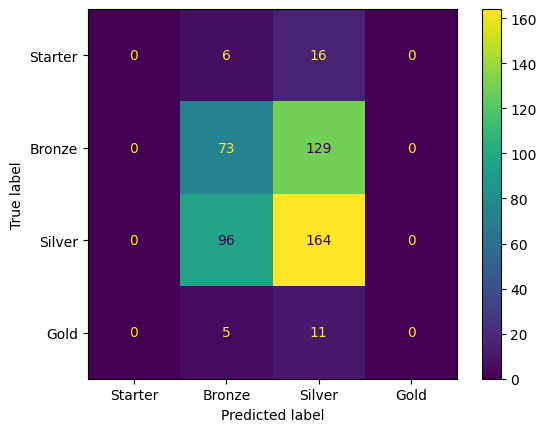

In [100]:
# Mostrar matriz de confusão
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()

## Tuning de Hiperparâmetros

In [101]:
# Ajustar Hiperparametros do modelo usando Optuna
# min_samples_leaf = Minimo de instâncias requerido para formar uma folha (nó terminal)
# max_depth = Profundidade máxima de árvore

def decisiontree_optuna(trial):
    
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,20)
    max_depth = trial.suggest_int('max_depth', 1,8)
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)
    
    scores = cross_val_score(dt_model, x, y, cv=cv_folds, scoring='accuracy')
    
    return scores.mean()

In [121]:
# Executar a automação de experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=300)

[I 2025-10-05 18:18:51,353] A new study created in memory with name: no-name-46f7861d-15d7-4372-9e2d-2152990bea06


[I 2025-10-05 18:18:51,488] Trial 0 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 15, 'max_depth': 5}. Best is trial 0 with value: 0.45398359906692637.
[I 2025-10-05 18:18:51,598] Trial 1 finished with value: 0.48595579924488375 and parameters: {'min_samples_leaf': 2, 'max_depth': 1}. Best is trial 1 with value: 0.48595579924488375.
[I 2025-10-05 18:18:51,699] Trial 2 finished with value: 0.48595579924488375 and parameters: {'min_samples_leaf': 11, 'max_depth': 1}. Best is trial 1 with value: 0.48595579924488375.
[I 2025-10-05 18:18:51,788] Trial 3 finished with value: 0.4740518962075848 and parameters: {'min_samples_leaf': 12, 'max_depth': 2}. Best is trial 1 with value: 0.48595579924488375.
[I 2025-10-05 18:18:51,879] Trial 4 finished with value: 0.4620037034365005 and parameters: {'min_samples_leaf': 18, 'max_depth': 2}. Best is trial 1 with value: 0.48595579924488375.
[I 2025-10-05 18:18:51,966] Trial 5 finished with value: 0.48595579924488375 and pa

In [122]:
print(f"Melhor Acurácia: {estudo_decisiontree.best_value} \n Melhores parâmetros: {estudo_decisiontree.best_params}")

Melhor Acurácia: 0.48595579924488375 
 Melhores parâmetros: {'min_samples_leaf': 2, 'max_depth': 1}


## Visualizar Árvore

In [123]:
# Preparar o conjunto de dados para treinar e consegiir visualizar a árvore

x_train_tree = x.copy()
x_train_tree['localizacao_label'] = x_train_tree.localizacao.astype('category').cat.codes
x_train_tree['atividade_economica_label'] = x_train_tree.atividade_economica.astype('category').cat.codes
x_train_tree.drop(columns=['atividade_economica', 'localizacao'], axis=1, inplace=True)
x_train_tree.rename(columns={'localizacao_label': 'localizacao', 'atividade_economica_label': 'atividade_economica'}, inplace=True)
x_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [ ]:
# Treinar o modelo com o conjunto de hiperparâmetros ideal

clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'], 
                                          max_depth=estudo_decisiontree.best_params['max_depth'])
y_train_tree = y.copy()
clf_decisiontree.fit(x_train_tree, y_train_tree)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.25, 'gini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.5, '  False')]

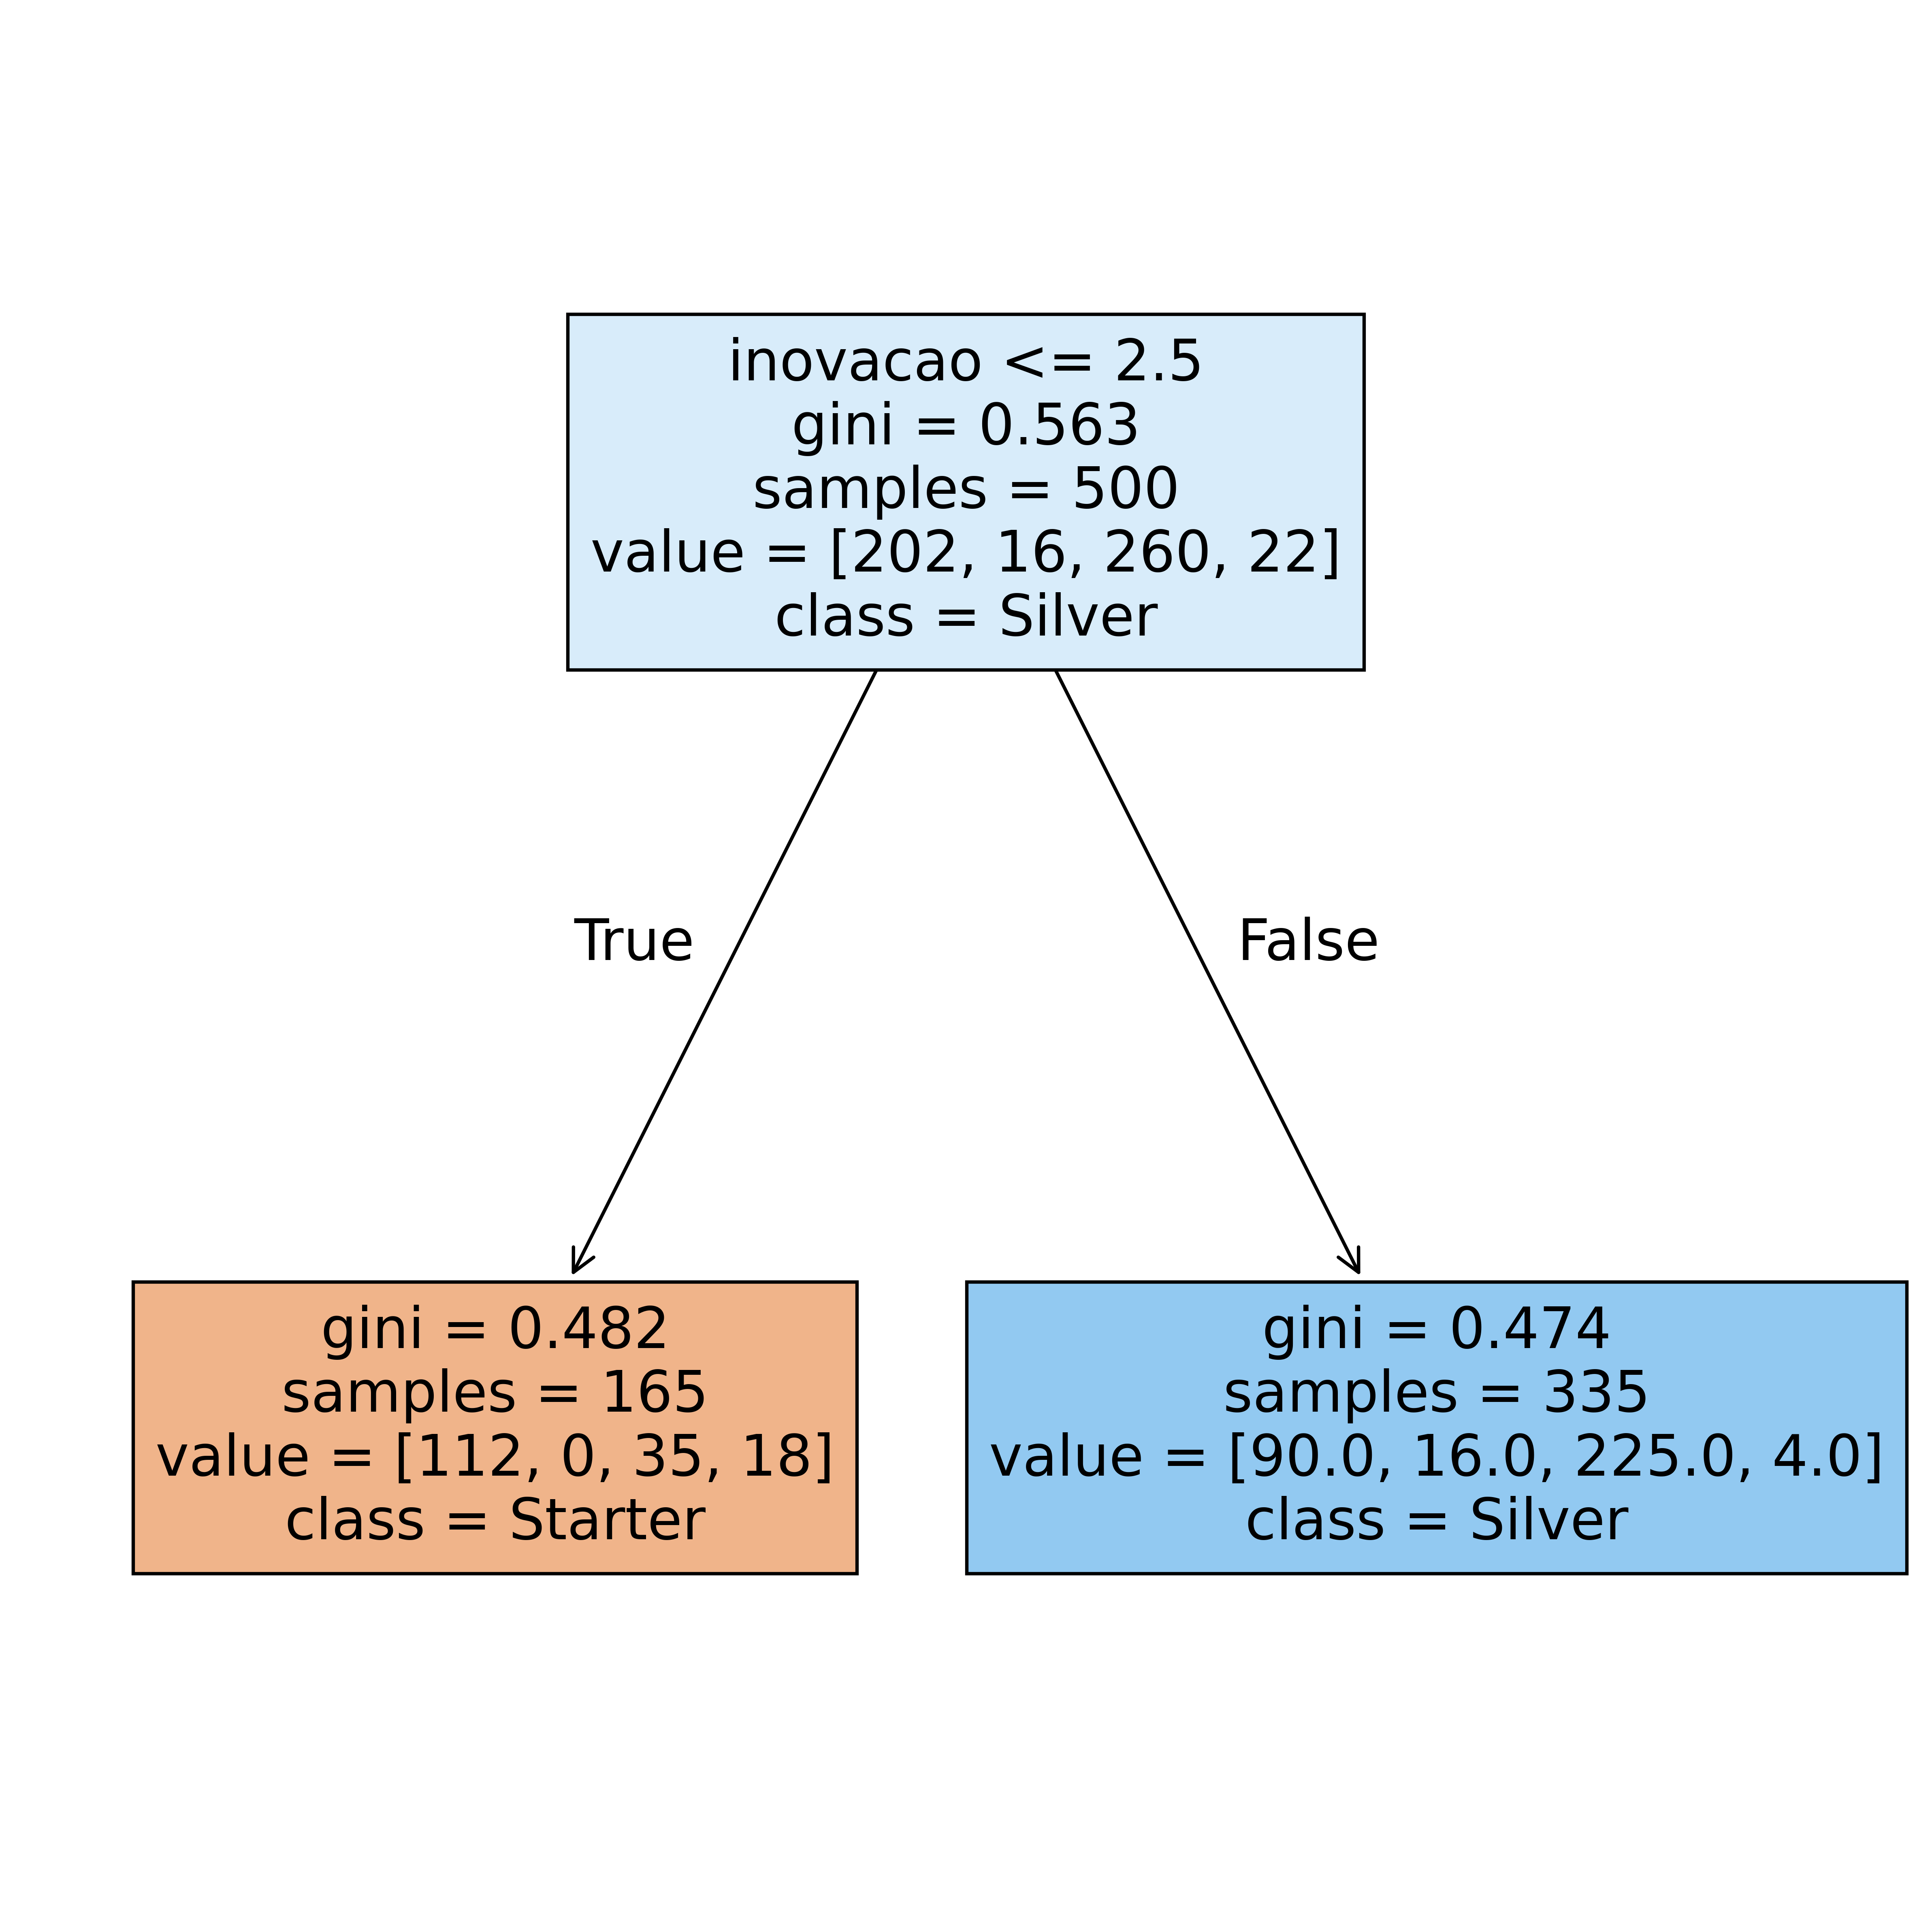

In [125]:
# Visualizar a arvore de decisao
fig, axes = plt.subplots(nrows=1, ncols= 1, figsize=(10,10), dpi=600)
plot_tree(clf_decisiontree, feature_names=x_train_tree.columns.to_numpy(), class_names = lista_segmentos, filled=True)

## Salvar modelo

In [127]:
import joblib

# Criar um pipeline tunado
dt_model_tunado = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', DecisionTreeClassifier(
                                      min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'],
                                      max_depth=estudo_decisiontree.best_params['max_depth']))])

dt_model_tunado.fit(x,y)

joblib.dump(dt_model_tunado, 'modelo_classificacao_decision.pkl' )

['modelo_classificacao_decision.pkl']

## Entregar modelo como App de predicao Batch (por arquivo)

In [129]:
import gradio as gr 

modelo = joblib.load('.\modelo_classificacao_decision.pkl')

def predict(arquivo):
    df_empresas = pd.read_csv(arquivo.name)
    y_pred = modelo.predict(df_empresas)
    df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('.\predicoes.csv', index=False)
    return '.\predicoes.csv'


demo = gr.Interface(
    predict,
    gr.File(file_types=[".csv"]),
    "file"
)

demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\uvicorn\protocols\http\h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\uvicorn\middleware\proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\fastapi\applications.py", line 1133, in __call__
    await super().__call__(scope, receive, send)
  File "c:\Users\PC\.virtualenvs\classificacao_arvore_decisao-fjoD_0jV\Lib\site-packages\starlette\applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "c:\Users\PC\.virtualenvs\